<a href="https://colab.research.google.com/github/parthib22/colaboratory/blob/main/skin_cancer_explainable_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Add this line to import the required function
from tensorflow.keras.backend import squeeze

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
os.environ['KAGGLE_USERNAME'] = "samadritdascsec"
os.environ['KAGGLE_KEY'] = "bbe5bacb8c138b5c7114d7422716f463"

In [ ]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

100% 98.7M/98.7M [00:01<00:00, 89.0MB/s]
100% 98.7M/98.7M [00:01<00:00, 71.7MB/s]


In [ ]:
!unzip melanoma-skin-cancer-dataset-of-10000-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_654.jpg  
  inflating: melanoma_cancer_dataset/train/benign/mel

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have organized the dataset in the following structure:
# melanoma_cancer_dataset
# ├── train
# │   ├── benign
# │   │   ├── image1.jpg
# │   │   ├── ...
# │   └── malignant
# │       ├── image1.jpg
# │       ├── ...
# └── test
#     ├── benign
#     │   ├── image1.jpg
#     │   ├── ...
#     └── malignant
#         ├── image1.jpg
#         ├── ...

# Load the data
train_dir = './melanoma_cancer_dataset/train'
test_dir = './melanoma_cancer_dataset/test'


batch_size = 32
image_size = (28, 28)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Change this to 'categorical' if you have more than two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Change this to 'categorical' if you have more than two classes
)

# Modify the model to handle the new dataset
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))  # Assuming RGB images
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Change to the number of classes if more than two

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to 'categorical_crossentropy' if more than two classes
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
300/300 [==============================] - 17s 54ms/step - loss: 0.4244 - accuracy: 0.7953
Epoch 2/50
300/300 [==============================] - 17s 58ms/step - loss: 0.3192 - accuracy: 0.8632
Epoch 3/50
300/300 [==============================] - 16s 54ms/step - loss: 0.2999 - accuracy: 0.8730
Epoch 4/50
300/300 [==============================] - 17s 57ms/step - loss: 0.2808 - accuracy: 0.8815
Epoch 5/50
300/300 [==============================] - 16s 54ms/step - loss: 0.2717 - accuracy: 0.8861
Epoch 6/50
300/300 [==============================] - 16s 53ms/step - loss: 0.2558 - accuracy: 0.8914
Epoch 7/50
300/300 [==============================] - 17s 57ms/step - loss: 0.2531 - accuracy: 0.8905
Epoch 8/50
300/300 [==============================] - 16s 53ms/step - loss: 0.2434 - accuracy: 0.8973
Epoch 9/50
300/300 [==============================] - 17s 57ms/step - loss: 0.2343 - accuracy: 0.903

1/1 [==============================] - 0s 21ms/step


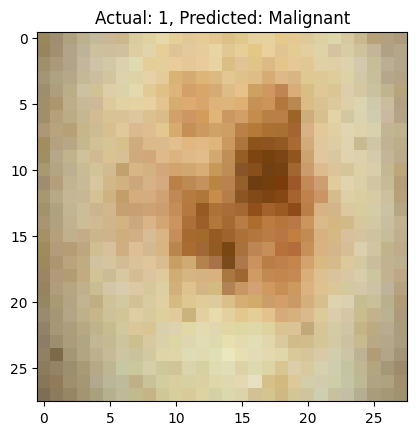

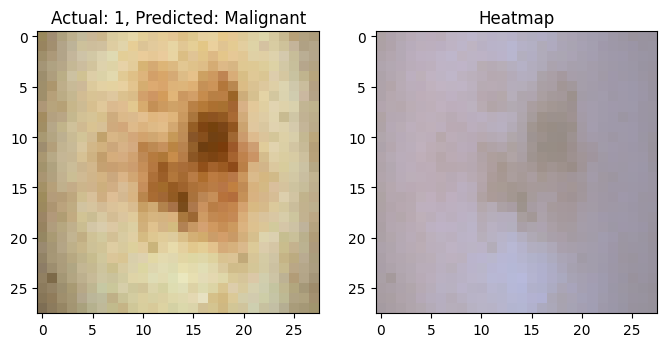

In [ ]:
random_index = np.random.randint(0, len(test_generator.filenames))
test_image_path = os.path.join(test_dir, test_generator.filenames[random_index])
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=image_size)
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0) / 255.0

prediction = model.predict(test_image_array)
predicted_label = "Malignant" if prediction[0][0] > 0.5 else "Benign"

# Display the test image and prediction
plt.imshow(test_image)
plt.title(f"Actual: {test_generator.labels[random_index]}, Predicted: {predicted_label}")
plt.show()

# Visualize the model activations and heatmaps (similar to the original code)
last_conv_layer_name = ""
for layer in reversed(model.layers):
    if 'conv2d' in layer.name:
        last_conv_layer_name = layer.name
        break

last_conv_layer = model.get_layer(last_conv_layer_name)
grad_model = models.Model([model.inputs], [last_conv_layer.output, model.output])

with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(test_image_array)
    loss = predictions[:, 0]  # Assuming binary classification

grads = tape.gradient(loss, conv_output)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
last_conv_output = conv_output[0]

heatmap = tf.multiply(last_conv_output, tf.reshape(pooled_grads, (1, 1, 1, -1)))
heatmap = tf.reduce_sum(heatmap, axis=-1)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

if heatmap.ndim not in (3, 4):
    raise ValueError('\'heatmap\' must have either 3 or 4 dimensions.')

if heatmap.ndim == 3:
    heatmap = heatmap[np.newaxis, :, :, :]

heatmap = tf.image.resize(heatmap, image_size)

heatmapped_image = (heatmap * test_image_array)

heatmapped_image = tf.squeeze(heatmapped_image)

# Display the heatmapped image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(test_image)
axes[0].set_title(f"Actual: {test_generator.labels[random_index]}, Predicted: {predicted_label}")
axes[1].imshow(heatmapped_image, cmap='jet', alpha=0.5)
axes[1].set_title("Heatmap")
plt.show()